In [7]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## 더 많은 데이터로 학습하기

In [12]:
def resize_images(img_path):
    images=glob.glob(img_path + "*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(96, 96)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

In [13]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=96
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
resize_images(image_dir_path)

1 images to be resized.
1  images resized.


In [16]:
# 가위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/scissor/"
resize_images(image_dir_path)

# 바위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/rock/"
resize_images(image_dir_path)

# 보 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/paper/"
resize_images(image_dir_path)

# test 이미지 resize
# 가위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/test/scissor/"
resize_images(image_dir_path)

# 바위 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/test/rock/"
resize_images(image_dir_path)

# 보 이미지 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/test/paper/"
resize_images(image_dir_path)

605 images to be resized.
605  images resized.
608 images to be resized.
608  images resized.
607 images to be resized.
607  images resized.
100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.
100 images to be resized.
100  images resized.


In [17]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/"
(x_train, y_train)=load_data(image_dir_path, number_of_data=1820)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1820 입니다.
x_train shape: (1820, 96, 96, 3)
y_train shape: (1820,)


In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1= 32
n_channel_2= 64
n_dense= 64
n_train_epoch= 10

model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(96,96,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(n_dense, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(3, activation='softmax'))

# 모델 확인
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [19]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
57/57 [==============================] - 34s 587ms/step - loss: 3.7257 - accuracy: 0.4500
Epoch 2/10
57/57 [==============================] - 33s 575ms/step - loss: 0.7272 - accuracy: 0.7000
Epoch 3/10
57/57 [==============================] - 33s 580ms/step - loss: 0.3224 - accuracy: 0.8769
Epoch 4/10
57/57 [==============================] - 33s 577ms/step - loss: 0.1630 - accuracy: 0.9462
Epoch 5/10
57/57 [==============================] - 33s 578ms/step - loss: 0.0714 - accuracy: 0.9797
Epoch 6/10
57/57 [==============================] - 32s 570ms/step - loss: 0.0827 - accuracy: 0.9764
Epoch 7/10
57/57 [==============================] - 34s 594ms/step - loss: 0.0449 - accuracy: 0.9896
Epoch 8/10
57/57 [==============================] - 34s 595ms/step - loss: 0.0151 - accuracy: 0.9967
Epoch 9/10
57/57 [==============================] - 34s 594ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
57/57 [==============================] - 34s 600ms/step - loss: 7.9684e-04 - ac

In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 96, 96, 3)
y_test shape: (300,)


In [21]:
test_loss, test_accuracy = model2.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 2s - loss: 1.0871 - accuracy: 0.4167
test_loss: 1.0870648622512817
test_accuracy: 0.4166666567325592


## 문제점
1. 9, 10 epoch에서 accuracy 1을 달성
2. train보다 test accuracy가 많이 떨어지는 점

try 방향:
1. 모델에 dropout을 통해 일반화 시도, Dense layer 하나 삭제하여 복잡도 감소
2. train 데이터셋 정리 필요...

In [22]:
model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(96,96,3)))
model3.add(keras.layers.MaxPool2D(2,2))
model3.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2,2)))
model3.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2,2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(n_dense, activation='relu'))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Dense(3, activation='softmax'))

# 모델 확인
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

In [23]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
57/57 [==============================] - 34s 591ms/step - loss: 5.1359 - accuracy: 0.3385
Epoch 2/10
57/57 [==============================] - 34s 591ms/step - loss: 1.0723 - accuracy: 0.4231
Epoch 3/10
57/57 [==============================] - 34s 598ms/step - loss: 0.9261 - accuracy: 0.5599
Epoch 4/10
57/57 [==============================] - 34s 596ms/step - loss: 0.7013 - accuracy: 0.6659
Epoch 5/10
57/57 [==============================] - 34s 593ms/step - loss: 0.5485 - accuracy: 0.7346
Epoch 6/10
57/57 [==============================] - 34s 595ms/step - loss: 0.4409 - accuracy: 0.7835
Epoch 7/10
57/57 [==============================] - 34s 598ms/step - loss: 0.3648 - accuracy: 0.8220
Epoch 8/10
57/57 [==============================] - 34s 596ms/step - loss: 0.2743 - accuracy: 0.8681
Epoch 9/10
57/57 [==============================] - 34s 596ms/step - loss: 0.2431 - accuracy: 0.8857
Epoch 10/10
57/57 [==============================] - 34s 597ms/step - loss: 0.1694 - accura

In [24]:
test_loss, test_accuracy = model3.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 2s - loss: 1.0934 - accuracy: 0.4067
test_loss: 1.0933808088302612
test_accuracy: 0.40666666626930237


예상되는 문제
1. 데이터 숫자가 적은 데에 비해 데이터 다양성 부족(100장 사이 유사도 높음)
    * 데이터 증강으로 보완가능하지 않을까...?
2. 적은 수의 데이터로 잘 학습시키기 위해서는 데이터 정제 필요할 것으로 보임  
    * ex) 배경 삭제, 손 크기 맞춰 리사이징, 손의 방향, 모양 일치시키기 등
3. 다른 사람의 가위바위보 이미지로 테스트 하는게 아니라 모든 데이터를 합쳐서 일정 비율을 테스트셋으로 빼놓는다면 accuracy 높아지지 않을까라는 생각  
  
  
3번 정도는 다시 시도해볼 수 있을 듯

In [2]:
image_datas = glob.glob(os.getenv("HOME") + "/aiffel/rock_scissor_paper/extended/all/*/*.jpg")
class_name =['rock', 'scissor', 'paper']
dic = {'rock':0, 'scissor':1, 'paper':2}

X = []
y = []
for imagename in image_datas:
    img = Image.open(imagename)
    img = img.resize((96, 96))
    img = np.array(img)
    X.append(img)
    label = imagename.split('/')[6]
    label = dic[label]
    y.append(label)

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((2720, 96, 96, 3), (2720,))

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1904, 96, 96, 3), (1904,), (816, 96, 96, 3), (816,))

1


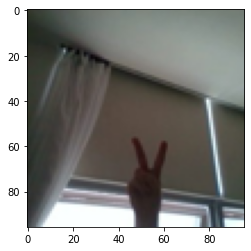

In [29]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1000])
print(y_train[1000])

In [30]:
model4=keras.models.Sequential()
model4.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(96,96,3)))
model4.add(keras.layers.MaxPool2D(2,2))
model4.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model4.add(keras.layers.MaxPooling2D((2,2)))
model4.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model4.add(keras.layers.MaxPooling2D((2,2)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(n_dense, activation='relu'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(3, activation='softmax'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

In [31]:
model4.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

model4.fit(X_train, y_train, epochs=10)

Epoch 1/10
60/60 [==============================] - 37s 603ms/step - loss: 4.2679 - accuracy: 0.4900
Epoch 2/10
60/60 [==============================] - 36s 602ms/step - loss: 0.6244 - accuracy: 0.7363
Epoch 3/10
60/60 [==============================] - 36s 602ms/step - loss: 0.3901 - accuracy: 0.8472
Epoch 4/10
60/60 [==============================] - 36s 605ms/step - loss: 0.2318 - accuracy: 0.9076
Epoch 5/10
60/60 [==============================] - 36s 606ms/step - loss: 0.1534 - accuracy: 0.9449
Epoch 6/10
60/60 [==============================] - 35s 592ms/step - loss: 0.1172 - accuracy: 0.9622
Epoch 7/10
60/60 [==============================] - 36s 605ms/step - loss: 0.0771 - accuracy: 0.9753
Epoch 8/10
60/60 [==============================] - 36s 595ms/step - loss: 0.0747 - accuracy: 0.9732
Epoch 9/10
60/60 [==============================] - 36s 602ms/step - loss: 0.0471 - accuracy: 0.9858
Epoch 10/10
60/60 [==============================] - 36s 604ms/step - loss: 0.0343 - accura

In [32]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

26/26 - 4s - loss: 0.0671 - accuracy: 0.9828
test_loss: 0.06706885993480682
test_accuracy: 0.9828431606292725


In [4]:
# 값 정규화해서 다시 하기
X = np.array(X)/225.0
y = np.array(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1904, 96, 96, 3), (1904,), (816, 96, 96, 3), (816,))

In [9]:
n_channel_1= 32
n_channel_2= 64
n_dense= 64
n_train_epoch= 10

model5=keras.models.Sequential()
model5.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(96,96,3)))
model5.add(keras.layers.MaxPool2D(2,2))
model5.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model5.add(keras.layers.MaxPooling2D((2,2)))
model5.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model5.add(keras.layers.MaxPooling2D((2,2)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(n_dense, activation='relu'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(3, activation='softmax'))

model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)             

In [10]:
model5.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

history = model5.fit(X_train, y_train, epochs=10)

Epoch 1/10
60/60 [==============================] - 35s 560ms/step - loss: 1.0990 - accuracy: 0.3193
Epoch 2/10
60/60 [==============================] - 32s 540ms/step - loss: 1.0988 - accuracy: 0.3114
Epoch 3/10
60/60 [==============================] - 33s 544ms/step - loss: 1.0988 - accuracy: 0.3193
Epoch 4/10
60/60 [==============================] - 33s 542ms/step - loss: 1.0988 - accuracy: 0.3225
Epoch 5/10
60/60 [==============================] - 32s 539ms/step - loss: 1.0988 - accuracy: 0.3214
Epoch 6/10
60/60 [==============================] - 32s 541ms/step - loss: 1.0987 - accuracy: 0.3141
Epoch 7/10
60/60 [==============================] - 33s 545ms/step - loss: 1.0988 - accuracy: 0.3314
Epoch 8/10
60/60 [==============================] - 33s 545ms/step - loss: 1.0988 - accuracy: 0.3172
Epoch 9/10
60/60 [==============================] - 33s 550ms/step - loss: 1.0986 - accuracy: 0.3325
Epoch 10/10
60/60 [==============================] - 32s 541ms/step - loss: 1.0987 - accura